# Chat GPT

In [1]:
import pandas as pd
from openai import OpenAI
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import argparse
import csv
import os

from _0_prepare_tasks import clean_csv
from _1_translate_tasks import translate_csv
from _2_solve_tasks import solve_tasks
from _3_technical_terms import extract_technical_terms
from _4_evaluate_solution import evaluate_solutions
from _5_cross_lang_validation import compare_results

## Data collection

#### Cleaning exercises list file

In [2]:
input_exercises = "topic_areas.csv"
cleaned_exercises = "topic_areas_cleaned.csv"

clean_csv(input_exercises, cleaned_exercises)

print(f"Cleaned exercises saved to {cleaned_exercises}")

Cleaned exercises saved to topic_areas_cleaned.csv


### Translate exercises to German and Arabic

In [3]:
translated_exercises_de = "topic_areas_cleaned_de.csv"
translated_exercises_ar = "topic_areas_cleaned_ar.csv"

**German translation**

In [4]:
translate_csv(cleaned_exercises, translated_exercises_de, target_language="German")
print(f"Translated tasks to German saved to {translated_exercises_de}")

Translating exercises from English to German...
Translation to German complete. CSV file saved as: topic_areas_cleaned_de.csv.
Translated tasks to German saved to topic_areas_cleaned_de.csv


**Arabic translation**

In [5]:
translate_csv(cleaned_exercises, translated_exercises_ar, target_language="Arabic")
print(f"Translated tasks to Arabic saved to {translated_exercises_ar}")

Translating exercises from English to Arabic...
Translation to Arabic complete. CSV file saved as: topic_areas_cleaned_ar.csv.
Translated tasks to Arabic saved to topic_areas_cleaned_ar.csv


## Solving Exercises

In [6]:
solved_exercises_en = "topic_areas_solutions_en.csv"
solved_exercises_de = "topic_areas_solutions_de.csv"
solved_exercises_ar = "topic_areas_solutions_ar.csv"

In [7]:
def show_results_overview(df, model="gpt-4o-mini"):
    for index, row in df.iterrows():
        if index > 3:
            break;
        print(f"Topic Area: {row['Topic Area']}")
        print(f"Topic: {row['Topic']}")
        print(f"Progress Level: {row['Progress Level']}")
        print(f"Exercise: {row['Exercise']}")
        print()
        print(f"gpt-4o solution:")
        print(f"{row[f"{model} solution"]}")
        print(f"--------------------------\n")

In [8]:
import importlib
import _2_solve_tasks

importlib.reload(_2_solve_tasks)
from _2_solve_tasks import solve_tasks

**English Solutions:**

In [9]:
solve_tasks(cleaned_exercises, solved_exercises_en)
print(f"Solved tasks in English saved to {solved_exercises_en}")

df_en = pd.read_csv(solved_exercises_en)
print(df_en.head())

Solving task 1: Draw 10 stars in the box and color 5 of them blue.
Solving task 2: Count the number of apples in the picture and write the total number in the empty circle below.
Solving task 3: Write the numbers from 1 to 20 in order on the lines provided.
Solving task 4: Draw lines to connect the numbers 1 to 20 with their matching dot patterns.
Solving task 5: Circle the number that has the same number of dots underneath it; for example if you see 5 dots circle the number 5.
Solving task 6: Fill in the blanks with the correct number symbol that matches the dot patterns shown on the page.
Solving task 7: Emma has 24 apples and she gives 13 apples to her friend; how many apples does she have left?
Solving task 8: A farmer has 36 carrots and picks another 12 carrots; how many carrots does he have in total?
Solving task 9: Liam read 45 pages of his book then finished 22 more pages; how many pages did he read altogether?
Solving task 10: Sarah has 8 boxes of cookies and each box contains

**German Solutions:**

In [11]:
solve_tasks(translated_exercises_de, solved_exercises_de, prompt_prefix='Erkläre mir wie ich diese Aufgaben lösen kann')
print(f"Solved tasks in German saved to {solved_exercises_de}")

Solving task 1: Zeichne 10 Sterne in das Kästchen und male 5 davon blau.
Solving task 2: Zähle die Anzahl der Äpfel im Bild und schreibe die Gesamtsumme in den leeren Kreis darunter.
Solving task 3: Schreibe die Zahlen von 1 bis 20 der Reihenfolge nach auf die vorgesehenen Linien.
Solving task 4: Zeichne Linien, um die Zahlen 1 bis 20 mit ihren passenden Punktmustern zu verbinden.
Solving task 5: Umkreise die Zahl, die die gleiche Anzahl von Punkten darunter hat; zum Beispiel, wenn du 5 Punkte siehst, umkreise die Zahl 5.
Solving task 6: Fülle die Lücken mit dem richtigen Zahlensymbol aus, das den auf der Seite gezeigten Punktmustern entspricht.
Solving task 7: Emma hat 24 Äpfel und sie gibt 13 Äpfel an ihre Freundin; wie viele Äpfel hat sie noch?
Solving task 8: Ein Bauer hat 36 Karotten und pflückt weitere 12 Karotten; wie viele Karotten hat er insgesamt?
Solving task 9: Liam hat 45 Seiten seines Buches gelesen und dann 22 weitere Seiten beendet; wie viele Seiten hat er insgesamt gel

**Arabic Solutions:**

In [12]:
solve_tasks(translated_exercises_ar, solved_exercises_ar, prompt_prefix='اشرحلي خطوات حل هذه المسألة')
print(f"Solved tasks in Arabic saved to {solved_exercises_ar}")

Solving task 1: ارسم 10 نجوم في الصندوق والون 5 منها باللون الأزرق.
Solving task 2: احسب عدد التفاح في الصورة واكتب العدد الكلي في الدائرة الفارغة أدناه.
Solving task 3: اكتب الأرقام من 1 إلى 20 بالترتيب على الأسطر المتاحة.
Solving task 4: ارسم خطوطاً لربط الأرقام من 1 إلى 20 بأنماط النقاط المطابقة لها.
Solving task 5: قم بدائرة الرقم الذي يحتوي على نفس عدد النقاط الموجودة تحته؛ على سبيل المثال، إذا رأيت 5 نقاط، قم بدائرة الرقم 5.
Solving task 6: املأ الفراغات بالرمز الرقمي الصحيح الذي يطابق أنماط النقاط الموضحة في الصفحة.
Solving task 7: إيما لديها 24 تفاحة وقد أعطت 13 تفاحة لصديقتها؛ كم عدد التفاح المتبقي لديها؟
Solving task 8: مزارع لديه 36 جزرة ويقطف 12 جزرة أخرى؛ كم عدد الجزر التي يمتلكها في المجموع؟
Solving task 9: ليام قرأ 45 صفحة من كتابه ثم أنهى 22 صفحة أخرى؛ فكم صفحًة قرأها إجمالًا؟
Solving task 10: سارة لديها 8 علب من الكعك وكل علبة تحتوي على 12 كعكة; كم عدد الكعك الذي تمتلكه في المجموع؟
Solving task 11: يمتلك مزارع 240 تفاحة ويريد تعبئتها في سلال بحيث تحتوي كل سلة على 15 تف

## Extracting technical terms

In [9]:
terms_en = "technical_terms_en.csv"
terms_de = "technical_terms_de.csv"
terms_ar = "technical_terms_ar.csv"

English terms

In [23]:
extract_technical_terms(cleaned_exercises, terms_en, target_language="en")
print(f"Extracted technical terms in English saved to {terms_en}")

Extracting technical terms for task 1: Draw 10 stars in the box and color 5 of them blue.
Extracting technical terms for task 2: Count the number of apples in the picture and write the total number in the empty circle below.
Extracting technical terms for task 3: Write the numbers from 1 to 20 in order on the lines provided.
Extracting technical terms for task 4: Draw lines to connect the numbers 1 to 20 with their matching dot patterns.
Extracting technical terms for task 5: Circle the number that has the same number of dots underneath it; for example if you see 5 dots circle the number 5.
Extracting technical terms for task 6: Fill in the blanks with the correct number symbol that matches the dot patterns shown on the page.
Extracting technical terms for task 7: Emma has 24 apples and she gives 13 apples to her friend; how many apples does she have left?
Extracting technical terms for task 8: A farmer has 36 carrots and picks another 12 carrots; how many carrots does he have in total

German terms

In [24]:
extract_technical_terms(cleaned_exercises, terms_de, target_language="de")
print(f"Extracted technical terms in German saved to {terms_de}")

Extracting technical terms for task 1: Draw 10 stars in the box and color 5 of them blue.
Extracting technical terms for task 2: Count the number of apples in the picture and write the total number in the empty circle below.
Extracting technical terms for task 3: Write the numbers from 1 to 20 in order on the lines provided.
Extracting technical terms for task 4: Draw lines to connect the numbers 1 to 20 with their matching dot patterns.
Extracting technical terms for task 5: Circle the number that has the same number of dots underneath it; for example if you see 5 dots circle the number 5.
Extracting technical terms for task 6: Fill in the blanks with the correct number symbol that matches the dot patterns shown on the page.
Extracting technical terms for task 7: Emma has 24 apples and she gives 13 apples to her friend; how many apples does she have left?
Extracting technical terms for task 8: A farmer has 36 carrots and picks another 12 carrots; how many carrots does he have in total

Arabic terms

In [25]:
extract_technical_terms(cleaned_exercises, terms_ar, target_language="ar")
print(f"Extracted technical terms in Arabic saved to {terms_ar}")

Extracting technical terms for task 1: Draw 10 stars in the box and color 5 of them blue.
Extracting technical terms for task 2: Count the number of apples in the picture and write the total number in the empty circle below.
Extracting technical terms for task 3: Write the numbers from 1 to 20 in order on the lines provided.
Extracting technical terms for task 4: Draw lines to connect the numbers 1 to 20 with their matching dot patterns.
Extracting technical terms for task 5: Circle the number that has the same number of dots underneath it; for example if you see 5 dots circle the number 5.
Extracting technical terms for task 6: Fill in the blanks with the correct number symbol that matches the dot patterns shown on the page.
Extracting technical terms for task 7: Emma has 24 apples and she gives 13 apples to her friend; how many apples does she have left?
Extracting technical terms for task 8: A farmer has 36 carrots and picks another 12 carrots; how many carrots does he have in total

## Pairwise Evaluation

In [10]:
solution_files = {
    "en": solved_exercises_en,
    "de": solved_exercises_de,
    "ar": solved_exercises_ar,
}

technical_terms_files = {
    "en": terms_en,
    "de": terms_de,
    "ar": terms_ar,
}

In [19]:
import importlib
import _7_pairwise_evaluation

importlib.reload(_7_pairwise_evaluation)
from _7_pairwise_evaluation import evaluate_explanations

C:\Users\IuG_Lap1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
df_results = evaluate_explanations(solution_files, technical_terms_files)

pd.set_option('display.max_colwidth', None)  # Ensure long explanations are visible
print(df_results.head())

Evaluating exercise 269... ✅ Saved exercise 269 to CSV.
✅ Saved exercise 270 to CSV.
✅ Saved exercise 271 to CSV.
✅ Saved exercise 272 to CSV.
✅ Saved exercise 273 to CSV.
✅ Saved exercise 274 to CSV.
✅ Saved exercise 275 to CSV.
✅ Saved exercise 276 to CSV.
✅ Saved exercise 277 to CSV.
✅ Saved exercise 278 to CSV.
✅ Saved exercise 279 to CSV.
✅ Saved exercise 280 to CSV.
✅ Saved exercise 281 to CSV.
✅ Saved exercise 282 to CSV.
✅ Saved exercise 283 to CSV.
✅ Saved exercise 284 to CSV.
✅ Saved exercise 285 to CSV.
✅ Saved exercise 286 to CSV.
✅ Saved exercise 287 to CSV.
✅ Saved exercise 288 to CSV.
✅ Saved exercise 289 to CSV.
✅ Saved exercise 290 to CSV.
✅ Saved exercise 291 to CSV.
✅ Saved exercise 292 to CSV.
✅ Saved exercise 293 to CSV.
✅ Saved exercise 294 to CSV.
✅ Saved exercise 295 to CSV.
✅ Saved exercise 296 to CSV.
Ranking-based evaluation completed. Results saved to judge_pairwise_evaluation.csv
   Exercise Index   Progress Level Best Explanation Worst Explanation  \
0    

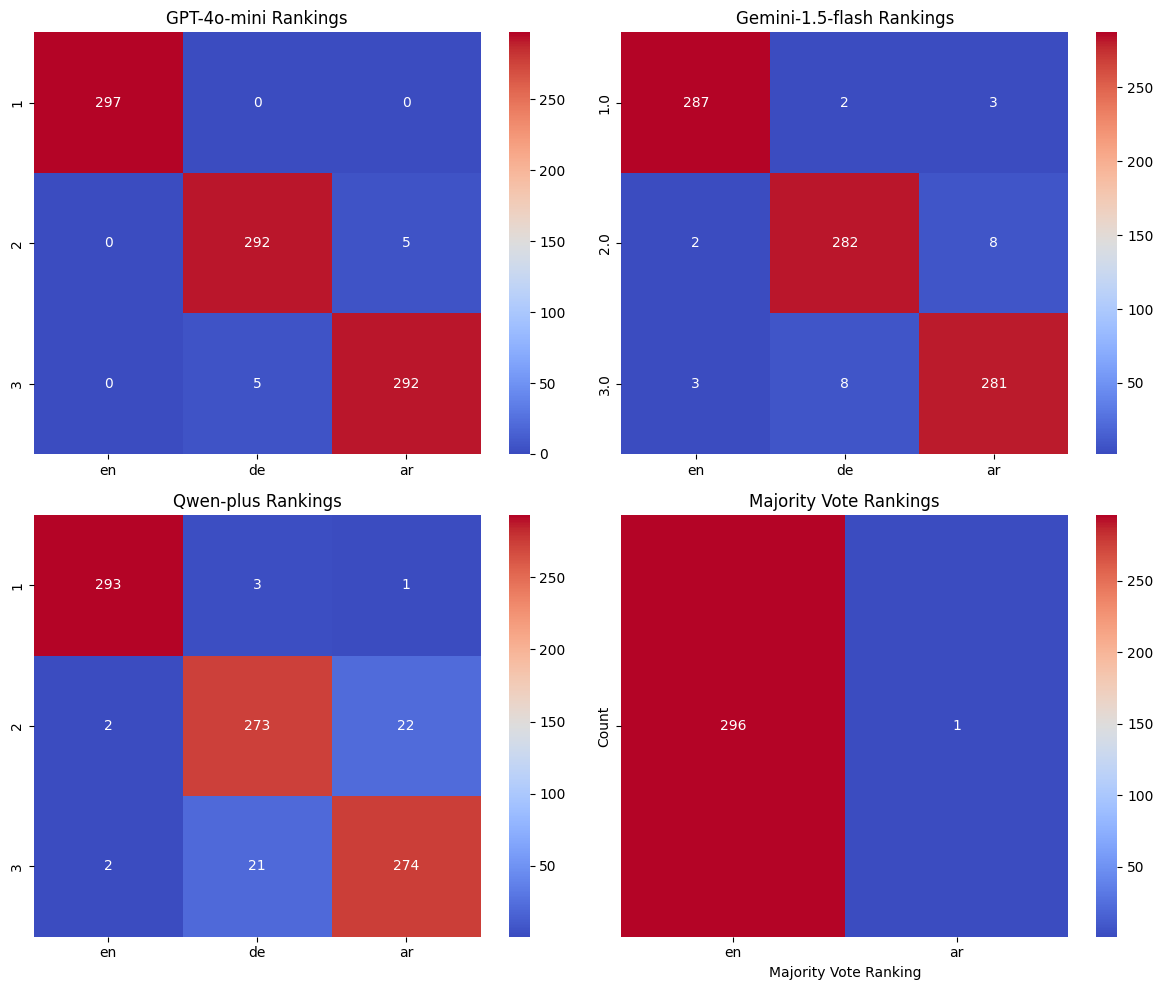

In [25]:
import ast
import re

expected_languages = list(solution_files.keys())  # ['en', 'de', 'ar']

def parse_ranking(ranking_str):
    """
    Converts ranking strings from '[en: 1, de: 2, ar: 3]' into a proper Python dictionary.
    """
    try:
        # Ensure it's a string before processing
        if not isinstance(ranking_str, str):
            return {}

        formatted_str = ranking_str.replace("Lang1", "en").replace("Lang2", "de").replace("Lang3", "ar") 

        #  Convert to dictionary
        ranking_dict = eval(formatted_str)  # Using eval carefully after regex formatting

        # Ensure it returns a dictionary
        if isinstance(ranking_dict, dict):
            return ranking_dict
        else:
            return {}

    except Exception as e:
        print(f"Error parsing ranking: {ranking_str} -> {e}")
        return {}

# Load the evaluation results
df_results = pd.read_csv('judge_pairwise_evaluation.csv')

# Apply parsing function to rankings
df_results["gpt-4o-mini Ranking"] = df_results["gpt-4o-mini Ranking"].apply(parse_ranking)
df_results["gemini-1.5-flash Ranking"] = df_results["gemini-1.5-flash Ranking"].apply(parse_ranking)
df_results["qwen-plus Ranking"] = df_results["qwen-plus Ranking"].apply(parse_ranking)
# df_results["Majority Vote Ranking"] = df_results["Majority Vote Ranking"].apply(parse_ranking)

# Convert ranking dictionaries into dataframes
gpt_rank_df = pd.DataFrame(df_results["gpt-4o-mini Ranking"].to_list())
gemini_rank_df = pd.DataFrame(df_results["gemini-1.5-flash Ranking"].to_list())
qwen_rank_df = pd.DataFrame(df_results["qwen-plus Ranking"].to_list())
majority_rank_df = pd.DataFrame(df_results["Majority Vote Ranking"].to_list())

# Rename columns based on the expected language keys
gpt_rank_df.columns = expected_languages
gemini_rank_df.columns = expected_languages
qwen_rank_df.columns = expected_languages
# majority_rank_df.columns = expected_languages

# Count how often each language gets each ranking position
gpt_ranking_counts = gpt_rank_df.apply(pd.Series.value_counts).fillna(0).astype(int)
gemini_ranking_counts = gemini_rank_df.apply(pd.Series.value_counts).fillna(0).astype(int)
qwen_ranking_counts = qwen_rank_df.apply(pd.Series.value_counts).fillna(0).astype(int)
# majority_ranking_counts = majority_rank_df.apply(pd.Series.value_counts).fillna(0).astype(int)

majority_ranking_counts = df_results["Majority Vote Ranking"].value_counts().to_frame()
majority_ranking_counts.columns = ["Count"]

# Set up the figure layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Heatmaps for individual LLM rankings
sns.heatmap(gpt_ranking_counts, annot=True, cmap="coolwarm", fmt="d", ax=axes[0, 0])
axes[0, 0].set_title("GPT-4o-mini Rankings")

sns.heatmap(gemini_ranking_counts, annot=True, cmap="coolwarm", fmt="d", ax=axes[0, 1])
axes[0, 1].set_title("Gemini-1.5-flash Rankings")

sns.heatmap(qwen_ranking_counts, annot=True, cmap="coolwarm", fmt="d", ax=axes[1, 0])
axes[1, 0].set_title("Qwen-plus Rankings")

# Heatmap for Majority Vote Ranking
sns.heatmap(majority_ranking_counts.T, annot=True, cmap="coolwarm", fmt="d", ax=axes[1, 1])
axes[1, 1].set_title("Majority Vote Rankings")

# Adjust layout
plt.tight_layout()
plt.show()

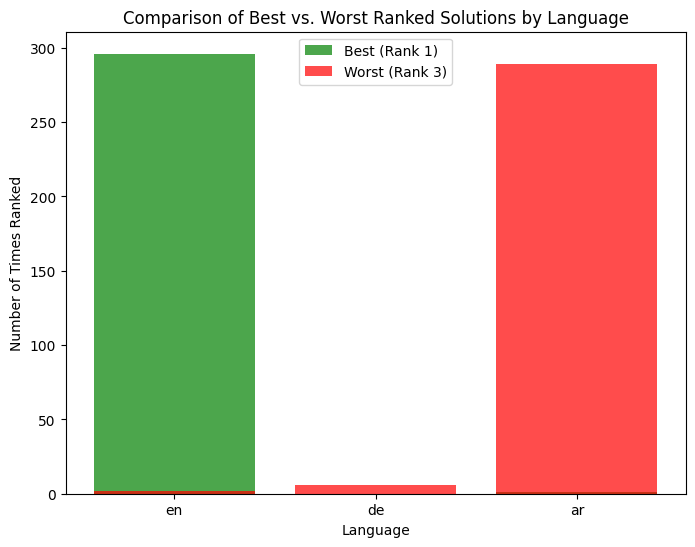

In [26]:
import matplotlib.pyplot as plt

# Count occurrences of each language in best and worst rankings
best_counts = df_results["Best Explanation"].value_counts()
worst_counts = df_results["Worst Explanation"].value_counts()

# Ensure all languages are included (even if they have 0 counts)
languages = list(solution_files.keys())  # ['en', 'de', 'ar']
best_counts = best_counts.reindex(languages, fill_value=0)
worst_counts = worst_counts.reindex(languages, fill_value=0)

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(best_counts.index, best_counts.values, label="Best (Rank 1)", color="green", alpha=0.7)
plt.bar(worst_counts.index, worst_counts.values, label="Worst (Rank 3)", color="red", alpha=0.7)
plt.xlabel("Language")
plt.ylabel("Number of Times Ranked")
plt.title("Comparison of Best vs. Worst Ranked Solutions by Language")
plt.legend()
plt.show()

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Define models and languages
models = ["gpt-4o-mini", "gemini-1.5-flash", "qwen-plus"]
languages = ["en", "de", "ar"]  # Fixed order for consistency

# Create lists for each language's ranking position across exercises
en_ranking, de_ranking, ar_ranking = [], [], []

# Iterate through all exercises
for _, row in df_results.iterrows():
    majority_best = row["Majority Vote Ranking"]  # The best language from Majority Vote
    if not isinstance(majority_best, str) or majority_best not in languages:
        continue  # Skip if invalid

    # Get the remaining two languages
    remaining_languages = [lang for lang in languages if lang != majority_best]
    if len(remaining_languages) != 2:
        continue  # Skip if incomplete data

    # Collect worst ranking votes across models
    worst_votes = Counter()
    for model in models:
        ranking_value = row.get(f"{model} Ranking", "")

        # Ensure ranking_value is a dictionary (convert string if needed)
        if isinstance(ranking_value, str) and ranking_value.strip().startswith("{"):
            try:
                ranking_dict = eval(ranking_value)  # Convert string to dictionary
            except:
                continue
        elif isinstance(ranking_value, dict):
            ranking_dict = ranking_value
        else:
            continue  # Skip if the value is neither dict nor valid string

        # Ensure ranking_dict contains all three languages
        if len(ranking_dict) < 3:
            continue  # Skip if incomplete ranking

        # Sort by ranking position (1 = best, 3 = worst)
        sorted_langs = sorted(ranking_dict, key=ranking_dict.get)

        if sorted_langs:
            worst_votes[sorted_langs[-1]] += 1  # Worst gets more votes

    # Determine worst language via majority vote
    worst_language = worst_votes.most_common(1)[0][0] if worst_votes else remaining_languages[0]

    # The last remaining language is the mid-ranked one
    mid_language = [lang for lang in remaining_languages if lang != worst_language][0]

    # Assign rankings to fixed language positions
    rank_mapping = {majority_best: 1, mid_language: 2, worst_language: 3}
    print(rank_mapping)
    en_ranking.append(rank_mapping["en"])
    de_ranking.append(rank_mapping["de"])
    ar_ranking.append(rank_mapping["ar"])

# Plot the ranking trends with fixed colors
plt.figure(figsize=(12, 6))

plt.plot(range(len(en_ranking)), en_ranking, marker="o", linestyle="-", label="English (en)", color="blue")
plt.plot(range(len(de_ranking)), de_ranking, marker="s", linestyle="--", label="German (de)", color="red")
plt.plot(range(len(ar_ranking)), ar_ranking, marker="x", linestyle=":", label="Arabic (ar)", color="green")

plt.xlabel("Exercise Index")
plt.ylabel("Ranking Position (1 = Best, 3 = Worst)")
plt.title("LLM Language Ranking Trends Across Exercises (Majority Vote)")
plt.yticks([1, 2, 3], labels=["Best (1)", "Mid (2)", "Worst (3)"])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'ar': 2, 'de': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'ar': 2, 'de': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, 'ar': 3}
{'en': 1, 'de': 2, '

KeyError: 'ar'

## Evaluating Solutions

In [17]:
evaluations_en = "topic_areas_evaluations_en.csv"
evaluations_de = "topic_areas_evaluations_de.csv"
evaluations_ar = "topic_areas_evaluations_ar.csv"

In [64]:
import importlib
import _4_evaluate_solution

importlib.reload(_4_evaluate_solution)
from _4_evaluate_solution import evaluate_solutions

In [65]:
evaluate_solutions(solved_exercises_en, terms_en, evaluations_en)
print(f"Evaluation of solutions in English saved to {evaluations_en}")

Evaluating solution for task 1: Draw 10 stars in the box and color 5 of them blue.
Evaluating solution for task 2: Count the number of apples in the picture and write the total number in the empty circle below.
Evaluating solution for task 3: Write the numbers from 1 to 20 in order on the lines provided.
Evaluating solution for task 4: Draw lines to connect the numbers 1 to 20 with their matching dot patterns.
Evaluating solution for task 5: Circle the number that has the same number of dots underneath it; for example if you see 5 dots circle the number 5.
Evaluating solution for task 6: Fill in the blanks with the correct number symbol that matches the dot patterns shown on the page.
Evaluating solution for task 7: Emma has 24 apples and she gives 13 apples to her friend; how many apples does she have left?
Evaluating solution for task 8: A farmer has 36 carrots and picks another 12 carrots; how many carrots does he have in total?
Evaluating solution for task 9: Liam read 45 pages of 

In [66]:
evaluate_solutions(solved_exercises_de, terms_de, evaluations_de)
print(f"Evaluation of solutions in German saved to {evaluations_de}")

Evaluating solution for task 1: Zeichne 10 Sterne in das Kästchen und male 5 davon blau.
Evaluating solution for task 2: Zähle die Anzahl der Äpfel im Bild und schreibe die Gesamtsumme in den leeren Kreis darunter.
Evaluating solution for task 3: Schreibe die Zahlen von 1 bis 20 der Reihenfolge nach auf die vorgesehenen Linien.
Evaluating solution for task 4: Zeichne Linien, um die Zahlen 1 bis 20 mit ihren passenden Punktmustern zu verbinden.
Evaluating solution for task 5: Umkreise die Zahl, die die gleiche Anzahl von Punkten darunter hat; zum Beispiel, wenn du 5 Punkte siehst, umkreise die Zahl 5.
Evaluating solution for task 6: Fülle die Lücken mit dem richtigen Zahlensymbol aus, das den auf der Seite gezeigten Punktmustern entspricht.
Evaluating solution for task 7: Emma hat 24 Äpfel und sie gibt 13 Äpfel an ihre Freundin; wie viele Äpfel hat sie noch?
Evaluating solution for task 8: Ein Bauer hat 36 Karotten und pflückt weitere 12 Karotten; wie viele Karotten hat er insgesamt?
Ev

In [67]:
evaluate_solutions(solved_exercises_ar, terms_ar, evaluations_ar)
print(f"Evaluation of solutions in Arabic saved to {evaluations_ar}")

Evaluating solution for task 1: ارسم 10 نجوم في الصندوق والون 5 منها باللون الأزرق.
Evaluating solution for task 2: احسب عدد التفاح في الصورة واكتب العدد الكلي في الدائرة الفارغة أدناه.
Evaluating solution for task 3: اكتب الأرقام من 1 إلى 20 بالترتيب على الأسطر المتاحة.
Evaluating solution for task 4: ارسم خطوطاً لربط الأرقام من 1 إلى 20 بأنماط النقاط المطابقة لها.
Evaluating solution for task 5: قم بدائرة الرقم الذي يحتوي على نفس عدد النقاط الموجودة تحته؛ على سبيل المثال، إذا رأيت 5 نقاط، قم بدائرة الرقم 5.
Evaluating solution for task 6: املأ الفراغات بالرمز الرقمي الصحيح الذي يطابق أنماط النقاط الموضحة في الصفحة.
Evaluating solution for task 7: إيما لديها 24 تفاحة وقد أعطت 13 تفاحة لصديقتها؛ كم عدد التفاح المتبقي لديها؟
Evaluating solution for task 8: مزارع لديه 36 جزرة ويقطف 12 جزرة أخرى؛ كم عدد الجزر التي يمتلكها في المجموع؟
Evaluating solution for task 9: ليام قرأ 45 صفحة من كتابه ثم أنهى 22 صفحة أخرى؛ فكم صفحًة قرأها إجمالًا؟
Evaluating solution for task 10: سارة لديها 8 علب من

## Results Comparisons

In [68]:
files = {
    "en": evaluations_en,
    "de": evaluations_de,
    "ar": evaluations_ar,
}

In [69]:
import importlib
import _5_cross_lang_validation

importlib.reload(_5_cross_lang_validation)
from _5_cross_lang_validation import compare_results

In [70]:
cross_validation_results = compare_results(files)

Index(['Topic Area', 'Topic', 'Progress Level', 'Exercise',
       'Problem Understanding (Comprehension)',
       'Clarity and Step-by-Step Explanation',
       'Accuracy of Process (Correctness of Steps)',
       'Correctness of Final Answer', 'Learning Appropriateness',
       'Generalization', 'Technical Terms Explanation',
       'Addressing Common Errors', 'Appropriateness Based on Progress Level',
       'Explanation Clarity & Syntax', 'Justification'],
      dtype='object')
Index(['Topic Area', 'Topic', 'Progress Level', 'Exercise',
       'Problem Understanding (Comprehension)',
       'Clarity and Step-by-Step Explanation',
       'Accuracy of Process (Correctness of Steps)',
       'Correctness of Final Answer', 'Learning Appropriateness',
       'Generalization', 'Technical Terms Explanation',
       'Addressing Common Errors', 'Appropriateness Based on Progress Level',
       'Explanation Clarity & Syntax', 'Justification'],
      dtype='object')
Index(['Topic Area', 'Topi

In [71]:
comparison_results = pd.read_csv('comparison_results.csv')
highest_averages = pd.read_csv('highest_averages.csv')

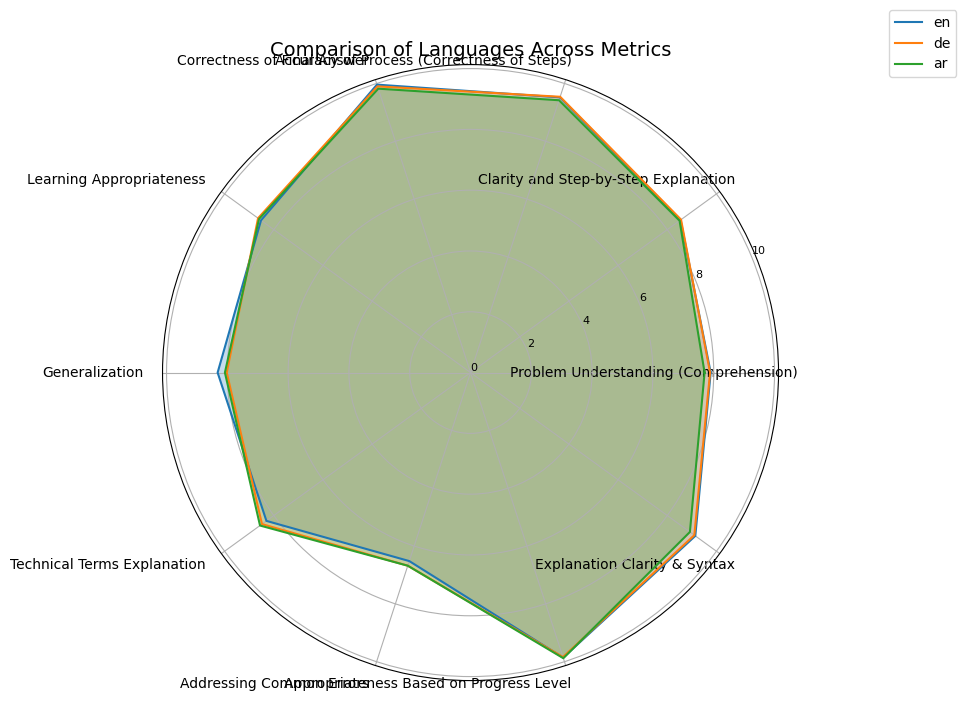

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read data from CSV
file_path = "comparison_results.csv"
df = pd.read_csv(file_path, index_col=0)  # Load CSV, set first column as index (languages)

# Extract languages and metrics dynamically
languages = df.index.tolist()
metrics = df.columns.tolist()

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each language's data
for lang in languages:
    data = df.loc[lang].tolist()  # Extract values for the language
    data += data[:1]  # Close the circle
    ax.plot(angles, data, label=lang)
    ax.fill(angles, data, alpha=0.25)

# Format radar chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=10, rotation=30, ha="right")
ax.set_yticks([0, 2, 4, 6, 8, 10])
ax.set_yticklabels(['0', '2', '4', '6', '8', '10'], fontsize=8)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Comparison of Languages Across Metrics', fontsize=14)
plt.show()


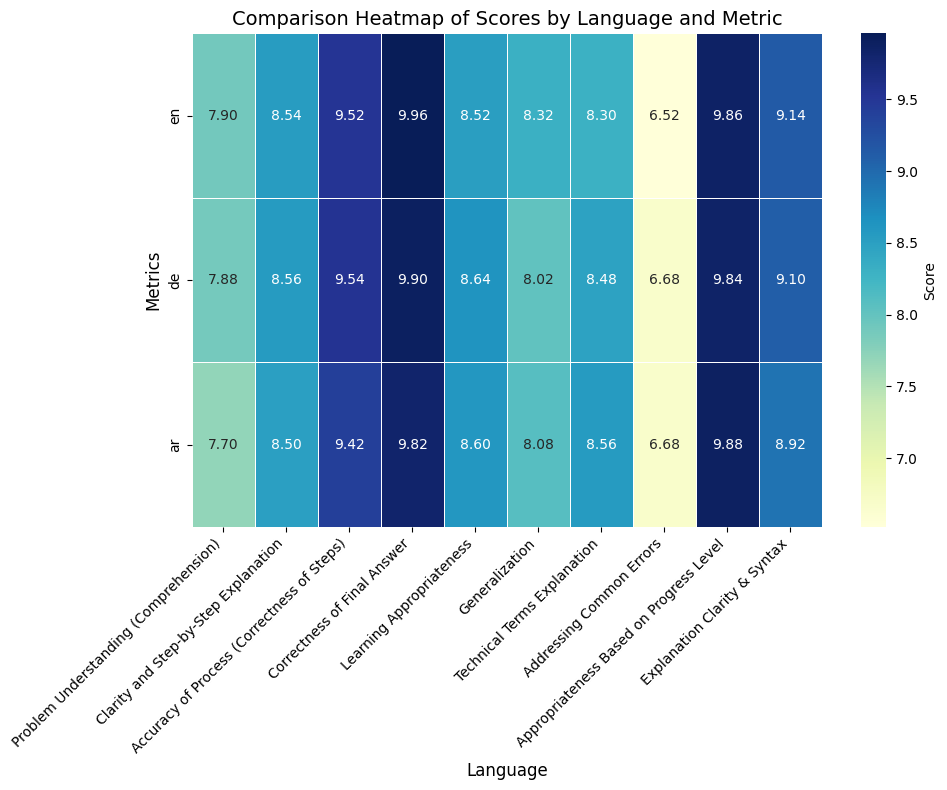

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("comparison_results.csv")

# Set the index of the DataFrame to the metrics column
data.set_index("Unnamed: 0", inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    data,
    annot=True,  # Show the values in each cell
    cmap="YlGnBu",  # Color palette
    fmt=".2f",  # Format the numbers to 2 decimal places
    linewidths=0.5,  # Add space between cells
    cbar_kws={'label': 'Score'}  # Label for the color bar
)

# Add labels and title
plt.title("Comparison Heatmap of Scores by Language and Metric", fontsize=14)
plt.xlabel("Language", fontsize=12)
plt.ylabel("Metrics", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [75]:
import importlib
import _6_find_differently_performing_exercises

importlib.reload(_6_find_differently_performing_exercises)
from _6_find_differently_performing_exercises import find_differently_performing_exercises

result = find_differently_performing_exercises([evaluations_en, evaluations_de, evaluations_ar])

result.to_csv("most_different_exercises.csv", index=False)

In [76]:
pd.read_csv("most_different_exercises.csv").head()

,exercise,language_1,language_2,language_3,Total_Difference
0,exercise_6,9.2,8.3,6.9,2.3
1,exercise_33,8.1,8.1,6.3,1.8
2,exercise_29,8.9,8.8,7.6,1.3
3,exercise_48,8.4,7.4,8.7,1.3
4,exercise_28,8.7,8.2,9.3,1.1


In [77]:
def get_exercise_solution(index, solutions_en, solutions_de, solutions_ar, model='gpt-4o-mini'):
    # Ensure index is within the bounds of the dataframes
    if index < 0 or index > len(solutions_en):
        raise ValueError("Index is out of bounds for the solutions dataframes.")
    
    # Retrieve the exercise solutions from each language file at the given index
    solution_en = solutions_en.iloc[index-1][f'{model} solution']  # Retrieve exercise solution in English
    solution_de = solutions_de.iloc[index-1][f'{model} solution']  # Retrieve exercise solution in German
    solution_ar = solutions_ar.iloc[index-1][f'{model} solution']  # Retrieve exercise solution in Arabic
    
    # Returning the exercise solutions as a dictionary
    return {
        'Exercise': solutions_en.iloc[index-1]['Exercise'],
        'English': solution_en,
        'German': solution_de,
        'Arabic': solution_ar
    }

In [78]:

# Example of usage:
index = 33  # Example index
sols_en = pd.read_csv(solved_exercises_en)
sols_de = pd.read_csv(solved_exercises_de)
sols_ar = pd.read_csv(solved_exercises_ar)
solutions = get_exercise_solution(index, sols_en, sols_de, sols_ar)
print(solutions['Exercise'])
print('---')
print(solutions['English'])
print('---')
print(solutions['German'])
print('---')
print(solutions['Arabic'])

A baker uses a pattern of ingredients: 1 cup of sugar 2 cups of flour 3 eggs __ __; identify the next two items in this ingredient pattern.
---
To solve the task of identifying the next two items in the ingredient pattern, you can analyze the given sequence of ingredients:

1. **Cup of Sugar**: 1 cup
2. **Cups of Flour**: 2 cups
3. **Eggs**: 3 eggs

From the items listed, it appears that the quantities of the ingredients are increasing incrementally by one for each item:

- The first ingredient (sugar) has 1 cup.
- The second ingredient (flour) has 2 cups.
- The third ingredient (eggs) has 3 eggs.

Assuming this incremental pattern continues, the next ingredient should have 4 of something, followed by 5 of something. 

Next, we need to think about what common baking ingredients might fit this pattern. Common ingredients could be:

4. **Cups of Milk**: 4 cups 
5. **Tablespoons of Butter**: 5 tablespoons (or perhaps 5 cups of something like water)

Therefore, the next two items in the in